## Imports

In [3]:
import fnmatch
import logging
import math
import multiprocessing
import os
import tempfile
from typing import Any, Dict, List, Optional, Tuple

import joblib
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import numpy as np
import requests
import torch
from torch.utils.data import Dataset, DataLoader


logger = logging.getLogger("notebook")

## GPT Papers
Here are the papers for reference
* GPT-1: [Improving Language Understanding
by Generative Pre-Training](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf)
* GPT-2: [Language Models are Unsupervised Multitask Learners](https://d4mucfpksywv.cloudfront.net/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)
* GPT-3: [Language Models are Few-Shot Learners](https://arxiv.org/pdf/2005.14165.pdf)


## Implementing the GPT-2 decoder stack
Here is the decoder-only stack from the GPT-1 paper:

![](https://i.stack.imgur.com/Kb8Gq.png)

NOTE a few changes introduced in GPT-2: 
* An additional layer normalization was added after the final self-attention block.
* We always have the feedforward layer four times the size of the bottleneck layer, dff = 4 ∗ dmodel

In [8]:
from char import GptTransfomer


class TutorialGptTransfomer(GptTransfomer):
    """"""

    def __init__(
        self,
        vocab_size: int,
        weight_decay: float = 0.1,
        betas: Tuple[float, float] = (0.9, 0.95),
        learning_rate: float = 3e-4,
        n_embedding_dims: int = 768,
        block_size: int = 128,
        embedding_drop_probability: float = 0.1,
        n_layers: int = 12,
        n_attention_heads: int = 4,
        residual_drop_probability: float = 0.1,
        self_attention_drop_probability: float = 0.1,
    ):
        super().__init__(vocab_size=vocab_size)
        self.hparams: Any  # Adding this line to please mypy.
        # Saves all of the arguments passed to __init__ to self.hparams
        self.save_hyperparameters()
        
        # ==============
        # IMPLEMENT THIS
        # ==============
        
        # Initialise parameters.
        self.apply(self._init_weights)
        n_parameters: int = sum(p.numel() for p in self.parameters())
        logger.info(f"Number of parameters: {n_parameters}")

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """forward pass of the model.

        Parameters
        ----------
        x : torch.Tensor
            input tensor of shape (batch_size, block_size). Here `x` is a
            sequence of tokens, where each token is an integer in the range
            [0, vocab_size).

        Returns
        -------
        logits : torch.Tensor
            output tensor of shape (batch_size, block_size, vocab_size).
        """
        batch_size, block_size = x.shape
        
        # ==============
        # IMPLEMENT THIS
        # ==============
        
        return logits
    
    
# TutorialGptTransfomer(vocab_size=10)

## GPT Transformer Block (we need to stack 12 of these)

Official implementation of the block:
* Official GPT-2 MLP implementation [here](https://github.com/openai/gpt-2/blob/a74da5d99abaaba920de8131d64da2862a8f213b/src/model.py#L115-L120), and MLP is invoked [here](https://github.com/openai/gpt-2/blob/a74da5d99abaaba920de8131d64da2862a8f213b/src/model.py#L128).
* Official GPT-2 block implementation [here](https://github.com/openai/gpt-2/blob/a74da5d99abaaba920de8131d64da2862a8f213b/src/model.py#L123-L130).

<img src="https://iili.io/poaGee.png" alt="drawing" width="200"/>

_Also note GPT-2 introduced over GPT-1:_
* LayerNorm was moved to the input of each sub-block, similar to a pre-activation residual network.


In [9]:
class GptTransformerBlock(torch.nn.Module):
    """an unassuming Transformer block"""

    def __init__(
        self,
        n_embedding_dims: int,
        n_attention_heads: int,
        self_attention_drop_probability: float,
        residual_drop_probability: float,
        block_size: int,
    ):
        super().__init__()
        
        # ==============
        # IMPLEMENT THIS
        # ==============


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward pass the transformer block."""
        
        # ==============
        # IMPLEMENT THIS
        # ==============
        
        return x

## Implementing the causal self-attention

Note there is the causal mask:
![](https://raw.githubusercontent.com/raviteja-ganta/raviteja-ganta.github.io/main/assets/images/Transformers/tf_24.png)

The rows here allow us to attend with each word in the sentance. We want to mask to prevent words from being attended with future words.

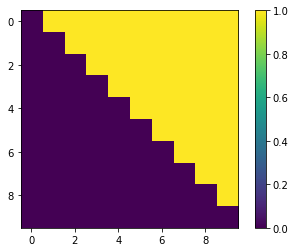

In [19]:
block_size: int = 10
# Build the causal mask.
triangle_matrix: torch.Tensor = torch.tril(torch.ones(block_size, block_size))
is_future_token_mask: torch.Tensor = torch.isclose(triangle_matrix, torch.tensor(0.0))
# Plot the thing:
plt.imshow(is_future_token_mask)
_ = plt.colorbar()

Lets keep the mask in the back of our minds. 

Next lets implement the self-attention module. All the steps looks something like:
![](https://raw.githubusercontent.com/raviteja-ganta/raviteja-ganta.github.io/main/assets/images/Transformers/tf_19.png)

In [ ]:
class CausalSelfAttention(torch.nn.Module):
    """A Causal Self-Attention module."""

    def __init__(
        self,
        n_embedding_dims: int,
        n_attention_heads: int,
        self_attention_drop_probability: float,
        residual_drop_probability: float,
        block_size: int,
    ):
        super().__init__()
        assert n_embedding_dims % n_attention_heads == 0, (
            "Number of embedding dimensions should be divisible by the number "
            "of attention heads, this means each head gets an equal share of "
            "the embedding dimensions."
        )
        
        # ==============
        # IMPLEMENT THIS
        # ==============


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Compute the self-attention."""
        batch_size, block_size, n_embedding_dims = x.shape
        
        # ==============
        # IMPLEMENT THIS
        # ==============
